# < NHÓM 05 > LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU


Cùng làm thôi...

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Khám phá dữ liệu (đan xen với pha tiền xử lý dữ liệu)

### Đọc dữ liệu từ tập tin 

Đọc dữ liệu từ file `score_college_exam_data.csv` và lưu vào DataFrame `core_df`.

In [87]:
core_df = pd.read_csv('score_college_exam_data.csv', index_col= "Unnamed: 0")
core_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Ta tính số dòng và số cột của DataFrame `core_df` và lưu vào biến `shape` (tuple). 

In [88]:
core_df.shape

(3665169, 11)

## Câu hỏi: Liệu học phí có ảnh hưởng quá nhiều đến điểm chuẩn?

### Như chúng ta đã biết, năm 2022 ngành IT hệ đại trà ở trường ĐH KHTN đã tăng học phí lên 27 triệu/năm, nhiều gần gấp đôi so với mức học phí cũ (14.5tr). Như vậy, điều này có làm cho ngành này giảm điểm mạnh không? Hay cho dù có tăng nhưng điểm số cũng không ảnh hưởng.

### Dựa vào bộ dữ liệu điểm thi và điểm chuẩn của 3 hệ ngành IT (Đại trà, tiên tiến, CLC) những năm 2019,2020,2021, đưa ra dự đoán điểm chuẩn của các nhóm ngành này vào năm 2022 (không xét tới yếu tố học phí) và so sánh với thực tế xem là học phí có phải thứ ảnh hưởng quá nhiều đến điểm chuẩn không? (Giả sử ta chỉ tính điểm của các thí sinh thi khối A0,A1)

Ta chỉ xét những bạn thi khối A0 và A1, nên những bạn không thi những môn trong các khối này sẽ bị loại đi

In [89]:
data_for_A = core_df.dropna(subset=['Toan','Li','Hoa','Ngoai_ngu'])

Làm như trên có thể vô tình loại luôn những thí sinh tự do, nhưng vì số lượng này cũng không nhiều nên để đơn giản hoá ta không tính vào

In [90]:
#Lấy các trường năm và điểm của các môn thuộc A0,A1
data_score = data_for_A[['Year','Toan','Ngoai_ngu','Li','Hoa']]

Giả sử tất cả các bạn ta xét trong tập dữ liệu data_scoce đều thi một trong 2 khối A00 hoặc A01, nhưng vì điểm xét chung cho cả 2 khối nên ta chỉ cần 1 cột điểm gọi là điểm xét tuyển. Điểm xét tuyển sẽ làm điểm lớn nhất giữa 2 điểm A0 và A1 của thí sinh.

In [91]:
data_score['AA'] = np.nan

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\3896450756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['AA'] = np.nan


Ta sẽ tính điểm xét tuyển của các thí sinh, nếu thí sinh có điểm A0 cao hơn thì trả về điểm A0, nếu thí sinh có điểm A1 cao hơn thì trả về A1.

In [92]:
def cal_score(row_student):
    score_toan_ly = row_student['Toan']+row_student['Li']
    if score_toan_ly + row_student['Hoa'] > score_toan_ly + row_student['Ngoai_ngu']:
        return score_toan_ly + row_student['Hoa']
    else:
        return score_toan_ly + row_student['Ngoai_ngu']


Tính điểm thi các khối cho từng thí sinh

In [93]:
AA = data_score.apply(cal_score, axis=1) 

Lưu kết quả vào các cột điểm trong data_score

In [94]:
data_score['AA'] = AA

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\1655038841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['AA'] = AA


Tiếp theo, chúng ta sẽ tính điểm trung bình của các khối này qua các năm 2019,2020,2021,2022

Để tránh bị loãng dữ liệu, ta chỉ xét những thí sinh có điểm số trên 24

In [95]:
df_score_24 = data_score[data_score['AA'] >= 24]

In [96]:
AA_2019 = df_score_24[df_score_24['Year'] == 2019]['AA'].mean()
AA_2019


25.120039568757885

In [97]:
AA_2020 = df_score_24[df_score_24['Year'] == 2020]['AA'].mean()
AA_2020

25.36409387839197

In [98]:
AA_2021 = df_score_24[df_score_24['Year'] == 2021]['AA'].mean()
AA_2021

25.33824562622183

In [99]:

AA_2022 = df_score_24[df_score_24['Year'] == 2022]['AA'].mean()
AA_2022

25.33361672134829

Ta sẽ dùng mô hình Linear Regression để đưa ra dự đoán điểm chuẩn 2022

In [100]:
from sklearn.linear_model import LinearRegression

Ta đọc file điểm chuẩn của 4 năm 2019 đến 2022 sau đó lưu vào df_score. Ta sẽ thử xem liệu mô hình có đưa ra kết quả sát với thực tế không

In [101]:
df_score = pd.read_csv('diemchuanITHCMUS.csv',index_col= 'Unnamed: 0')
df_score

,2019,2020,2021,2022
ĐT,25.0,27.20,27.4,27.2
TT,24.6,26.65,28.0,28.2
CLC,23.2,25.75,26.9,27.2


Để dự đoán điểm, có thể phải cần thêm một yếu tố khác đó là chỉ tiêu xét tuyển

Để xem sự ảnh hưởng thì ta sẽ dự đoán trong 2 trường hợp, một là với điểm riêng và hai là có thêm chỉ tiêu

In [102]:
df_number = pd.DataFrame([],index = ['ĐT','TT','CLC'])
df_number[2019] = np.array([250,40,150])
df_number[2020] = [140,28,153]
df_number[2021] = [185,24,147]
df_number[2022] = [180,24,150]
df_number.to_csv('chitieuhcmusit.csv')

In [103]:
df_number = pd.read_csv('chitieuhcmusit.csv',index_col= 'Unnamed: 0')
df_number

,2019,2020,2021,2022
ĐT,250,140,185,180
TT,40,28,24,24
CLC,150,153,147,150


Đầu tiên ta có x là điểm trung bình của 2 khối trong các năm 2019, 2020, 2021 và chỉ tiêu tuyển sinh (chia thành 2 trường hợp)

In [104]:
x1 = np.array([[AA_2019,df_number.loc['ĐT']['2019']],
                [AA_2020,df_number.loc['ĐT']['2020']],
                [AA_2021,df_number.loc['ĐT']['2021']]])

x2 = np.array([[AA_2019,df_number.loc['TT']['2019']],
                [AA_2020,df_number.loc['TT']['2020']],
                [AA_2021,df_number.loc['TT']['2021']]])

x3 = np.array([[AA_2019,df_number.loc['CLC']['2019']],
                [AA_2020,df_number.loc['CLC']['2020']],
                [AA_2021,df_number.loc['CLC']['2021']]])

x_only_score = ([[AA_2019],
                [AA_2020],
                [AA_2021]])


Sau đó, ta gán y1 là điểm của đại trà, y2 là điểm của tiên tiến, y3 là điểm của CLC trong 3 năm 2019, 2020, 2021 

In [105]:
#ĐT
y1 = np.array(df_score.loc['ĐT'][:-1])
#TT
y2 = np.array(df_score.loc['TT'][:-1])
#CLC
y3 = np.array(df_score.loc['CLC'][:-1])

Tạo các mô hình Linear Regression

In [106]:
model1 = LinearRegression().fit(x1,y1)
model2 = LinearRegression().fit(x2,y2)
model3 = LinearRegression().fit(x3,y3)

model4 = LinearRegression().fit(x_only_score,y1)
model5 = LinearRegression().fit(x_only_score,y2)
model6 = LinearRegression().fit(x_only_score,y3)


Sau khi tạo xong mô hình, ta sẽ đưa dữ liệu điểm của năm 2022 để mô hình dự đoán điểm chuẩn 2022

In [107]:
x1_new = np.array([[AA_2022,df_number.loc['ĐT']['2022']]])
x_new = [[AA_2022]]
#ĐT
diemchuan2022DT = model1.predict(x1_new)
print('Diem (co tinh yeu to chi tieu) = {}'.format(diemchuan2022DT))
diemchuan2022DT_only_score = model4.predict(x_new)
print('Diem (khong tinh yeu to chi tieu) = {}'.format(diemchuan2022DT_only_score))

Diem (co tinh yeu to chi tieu) = [27.26626559]
Diem (khong tinh yeu to chi tieu) = [27.11554899]


Ta chưa thấy sự khác biệt quá lớn ở việc tính thêm chỉ tiêu hay không

In [108]:
x2_new = np.array([[AA_2022,df_number.loc['TT']['2022']]])
x_new = [[AA_2022]]
#ĐT
diemchuan2022TT = model2.predict(x2_new)
print('Diem (co tinh yeu to chi tieu) = {}'.format(diemchuan2022TT))
diemchuan2022TT_only_score = model5.predict(x_new)
print('Diem (khong tinh yeu to chi tieu) = {}'.format(diemchuan2022TT_only_score))

Diem (co tinh yeu to chi tieu) = [28.02878681]
Diem (khong tinh yeu to chi tieu) = [27.08265984]


Ta đã thấy rõ ràng hơn khi tính yếu tố chỉ tiêu đã dự đoán lệch gần 1 điểm so với không tính

In [109]:
x3_new = np.array([[AA_2022,df_number.loc['CLC']['2022']]])
x_new = [[AA_2022]]
#ĐT
diemchuan2022CLC = model3.predict(x3_new)
print('Diem (co tinh yeu to chi tieu) = {}'.format(diemchuan2022CLC))
diemchuan2022CLC_only_score = model6.predict(x_new)
print('Diem (khong tinh yeu to chi tieu) = {}'.format(diemchuan2022CLC_only_score))

Diem (co tinh yeu to chi tieu) = [26.08767391]
Diem (khong tinh yeu to chi tieu) = [26.05560294]


Tương tự như đại trà, không có sự khác biệt lớn về việc xét theo tiêu chí chỉ tiêu

Như vậy, ta có thể thấy là điểm dự đoán ngành IT ĐT là  27.11 -> 27.269 (Điểm thực tế: 27.2). Như vậy, ở ngành IT đại trà, yếu tố học phí có thể chưa ảnh hưởng quá lớn đến điểm chuẩn của ngành. Nhưng ở CLC thì khác, điểm dự đoán ~ 26,05 nhưng thực tế là 27.2 . Tuy học phí ngành này giữ nguyên nhưng điểm lại tăng rất nhiều, nguyên nhân là do khi học phí ĐT tăng đến mức gần bằng CLC, sinh viên sẽ có xu hướng lựa chọn CLC để được nhiều điểm lợi như: ở trong thành phố, trang thiết bị hiện đại hơn, lớp ít sinh viên hơn,vv...

Tiếp theo ta sẽ vẽ biểu đồ biểu thị điểm trung bình của khối này so với điểm chuẩn của các ngành trong khối IT KHTN để xem độ tương quan qua các năm

In [110]:
diemtbA = pd.Series([AA_2019,AA_2020,AA_2021,AA_2022],index = ['2019','2020','2021','2022'])

diemDT = df_score.loc['ĐT']
diemTT = df_score.loc['TT']
diemCLC = df_score.loc['CLC']

In [111]:
diemtbA.values

array([25.12003957, 25.36409388, 25.33824563, 25.33361672])

Ta sẽ biểu diễn sự thay đổi điểm số qua các năm của các nhóm ngành IT KHTN và điểm trung bình khối A bằng lineplot

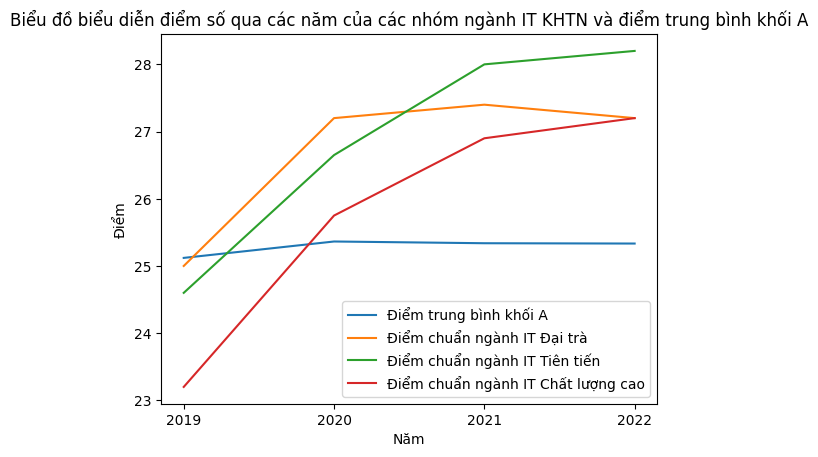

In [112]:
plt.plot(diemtbA.index,diemtbA.values,label = 'Điểm trung bình khối A')
plt.plot(diemDT.index,diemDT.values,label = 'Điểm chuẩn ngành IT Đại trà')
plt.plot(diemTT.index,diemTT.values,label = 'Điểm chuẩn ngành IT Tiên tiến')
plt.plot(diemCLC.index,diemCLC.values,label = 'Điểm chuẩn ngành IT Chất lượng cao')

plt.xlabel('Năm')
plt.ylabel('Điểm')
plt.title('Biểu đồ biểu diễn điểm số qua các năm của các nhóm ngành IT KHTN và điểm trung bình khối A')
plt.legend()
plt.show()

#### Từ năm 2020 điểm chuẩn tăng rất mạnh. Nguyên nhân là do số lượng chỉ tiêu cho kì thi THPTQG đã giảm đi khá nhiều (sự xuất hiện của kì thi đánh giá năng lực) + độ HOT của ngành IT